# ISIDORA data check

In [1]:
from __future__ import print_function
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
import tblFunctions as tbl
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) # Bigger plots
%matplotlib inline
%load_ext autoreload
%autoreload 2
print("This notebook has been run last on {} at {}.".format(time.strftime("%d/%m/%Y"),time.strftime("%H:%M:%S")))


/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This notebook has been run last on 15/10/2016 at 23:45:13.


In [12]:
def IntegrateTrue(twf):
    return twf.sum().sum(axis=1).ene_pes

def IntegrateRaw(rwf):
    return IntegrateCorr(2500-rwf)#np.sum( 2500 - rwf )
#    return np.sum( [ai - np.mean( ai[ np.where(abs(ai-np.mean(ai))<np.std(ai)) ] ) for ai in a ] )

def IntegrateCorr(cwf):
    return cwf.sum()

It is assumed that ISIDORA has already been run with the configuration shown below.

In [2]:
%ls /Users/Gonzalo/github/IC/data/

DIOMIRA0.h5@            DIOMIRA0_bkup_float.h5  out0_bkup.h5
DIOMIRA0_502.h2         in0.h5
DIOMIRA0_bkup.h5        out0.h5


In [ ]:
# %load /Users/Gonzalo/github/IC/Config/ISIDORA_default.csv
# Configuration file for ISIDORA
# The parameters for ISIDORA are:
#
#        PATH_IN = path to DST file
#        FILE_IN = name of DST file
#        FIRST_EVT,LAST_EVT,RUN_ALL,
#
#        RUN_ALL is used to decide whether to run all the events in the file
#        in case that the total number of events requested (LAST_EVT-FIRST_EVT)
#        exceeds the number of events in the DST file. If RUN_ALL is set to 1 (True),
#        the script will run over all elements in the DST,
#        otherwise it will exit with a warning.
#
#		 COEF decides whether to use CA (COEF = 0) or AC (COEF =1)
#
#        CA = Nominal (measured) values of the capacitors defining the filter
#        AC = nominal (measured) values of the accumulator
#        MAU_LEN = length of MAU
#        NSIGMA1 number of sigmas for thr1
#        NSIGMA2 number of sigmas for thr2
#        NSIGMA3 number of sigmas for thr3
#
#
PATH_IN,FILE_IN,FIRST_EVT,LAST_EVT,RUN_ALL,COEF,CA,AC,MAU_LEN,NSIGMA1,NSIGMA2,NSIGMA3,END
#
/Users/Gonzalo/github/IC/data/,DIOMIRA0.h5,0,10,0,0,6.02975448 6.22547194 6.0671337 6.22159457 6.29999787 6.09892384 6.18289435 6.21775591 6.19306671 6.30518792 6.20359891 6.312311921,0.0017643 0.00170883 0.00175343 0.0017099 0.00168862 0.00174429 0.0017206 0.00171095 0.00171778 0.00168723 0.00171486 0.00168533,250,5.0,0.0,2.0,1


# THRESHOLDS = 5.0, 0.0, 2.0

In [4]:
# open file and check its contents
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/DIOMIRA0_502.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/DIOMIRA0_502.h5 (File) ''
Last modif.: 'Sat Oct 15 23:28:43 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/acum (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/baseline (EArray(100, 12), shuffle, zlib(1)) ''
/BLR/mau (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/pulse_on (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/wait_over (EArray(100, 32000), shuffle, zlib(1)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(806,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtcwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtrwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(100, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(1420,), shuffle, zlib(1)) 'Store for PMTs TWF'
/TWF/SiPM (Table(10

In [5]:
pmttwf  = h5f.root.TWF.PMT
sipmtwf = h5f.root.TWF.SiPM
pmtblr  = h5f.root.RD.pmtblr
pmtcwf  = h5f.root.RD.pmtcwf
pmtrwf  = h5f.root.RD.pmtrwf
sipmrwf = h5f.root.RD.sipmrwf
pmtdf   = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
sipmdf  = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

## Check PMT CWF

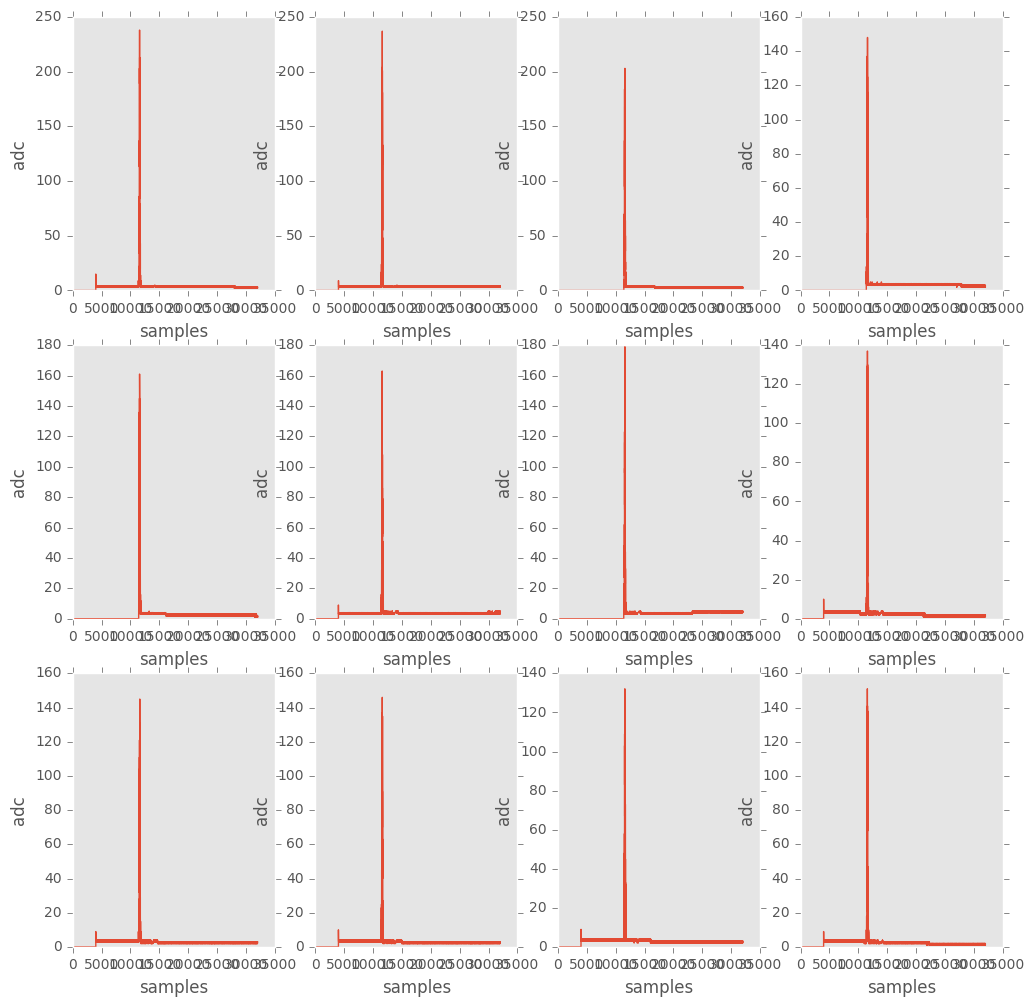

In [6]:
mpl.plot_waveforms(dict(enumerate(pmtcwf[0])))

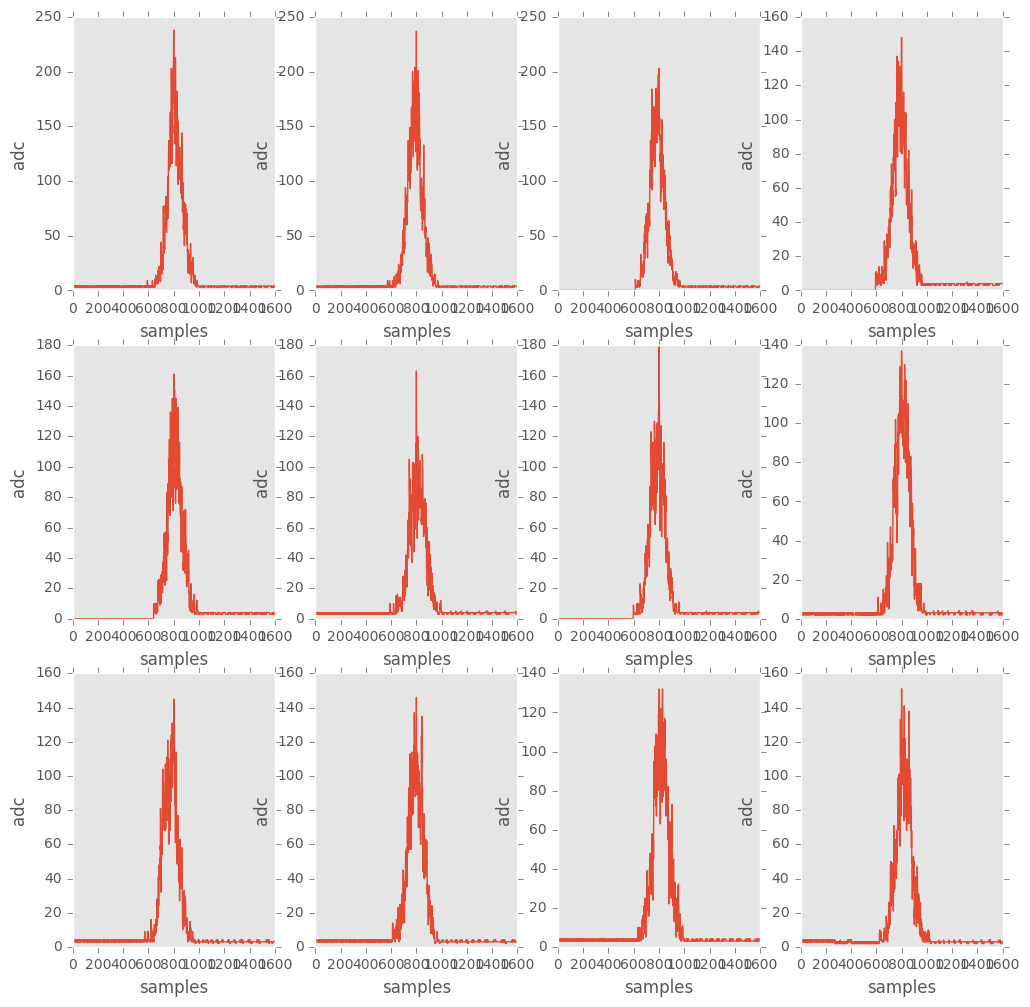

In [7]:
mpl.plot_waveforms(dict(enumerate(pmtcwf[0])),zoom=True)

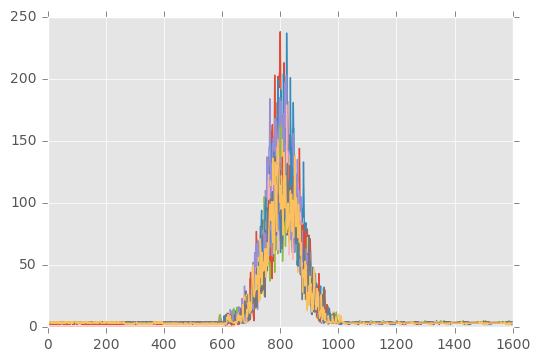

In [8]:
mpl.overlap_waveforms(pmtcwf,0)

## Compare CWF with BLR

RED  = CWF

BLUE = BLR

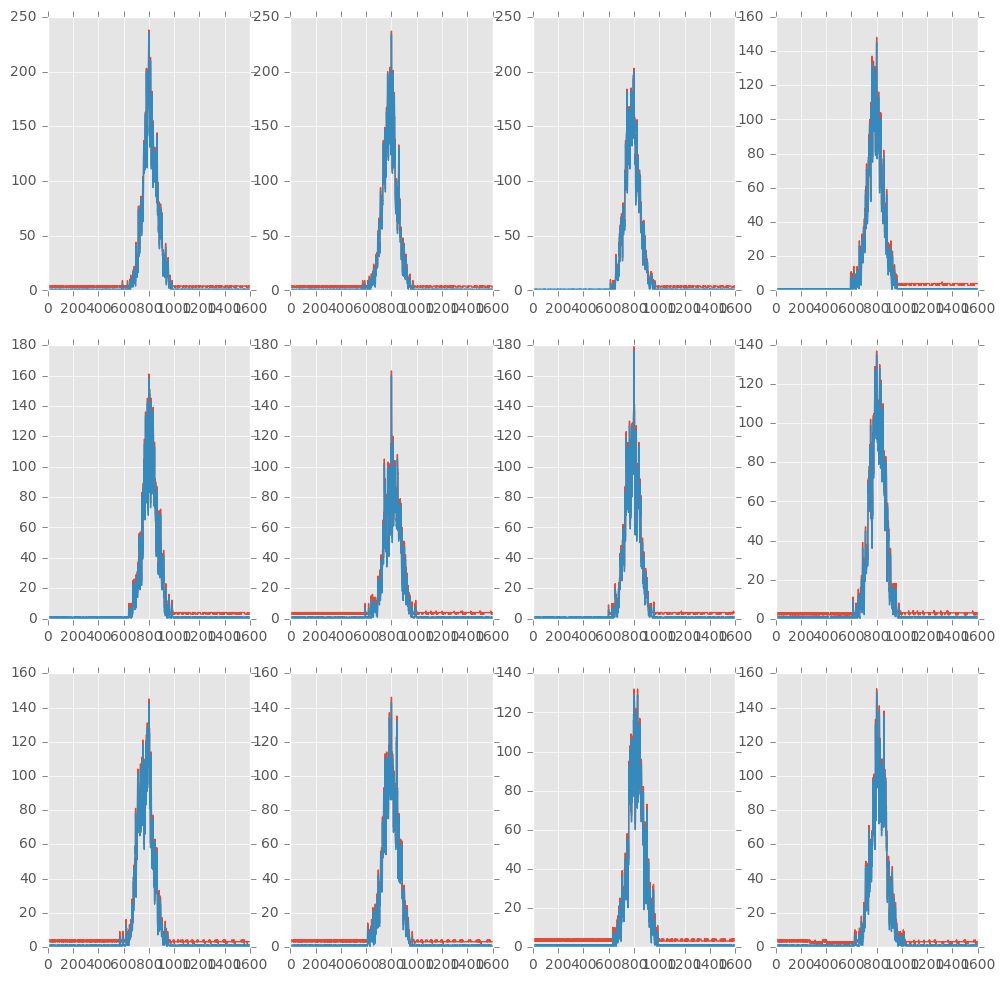

In [9]:
mpl.compare_corr_raw(pmtcwf,pmtblr,0)

## Compare CWF with RWF

RED  = CWF

BLUE = RWF

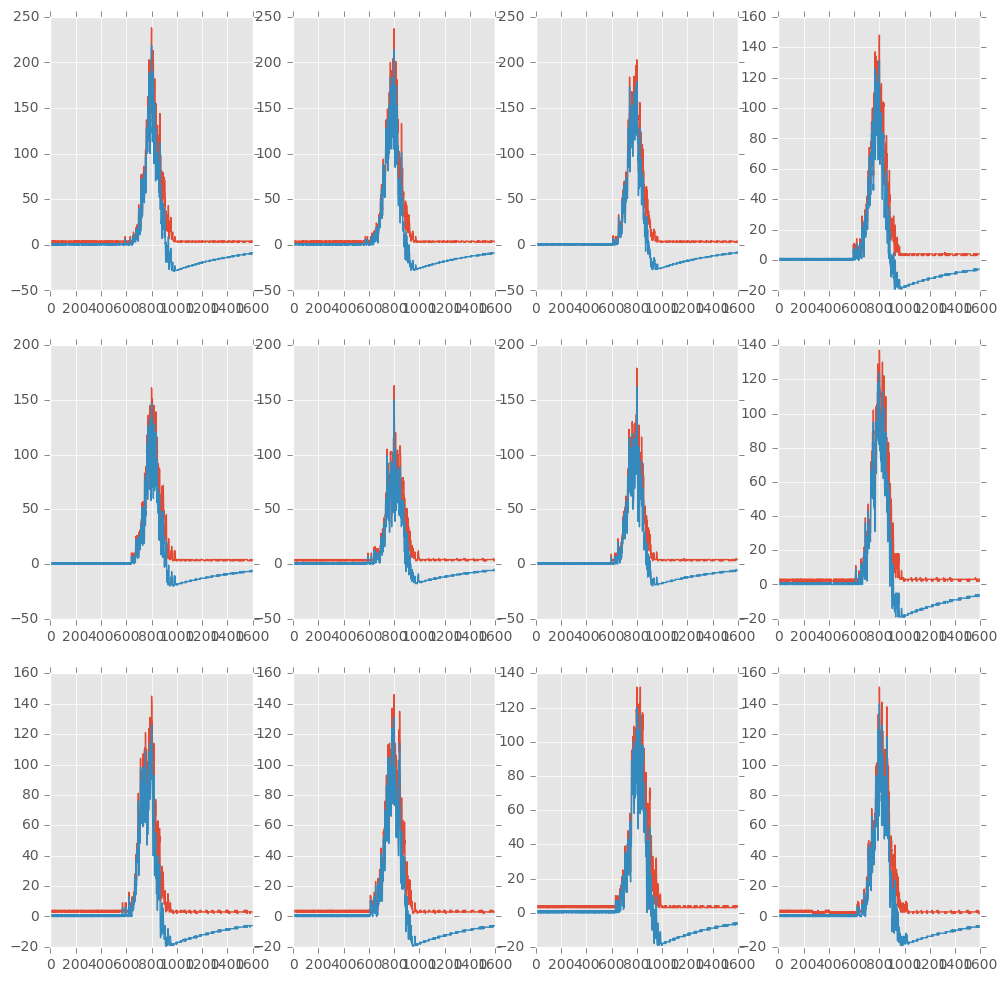

In [10]:
mpl.compare_corr_raw(pmtcwf,pmtrwf,0)

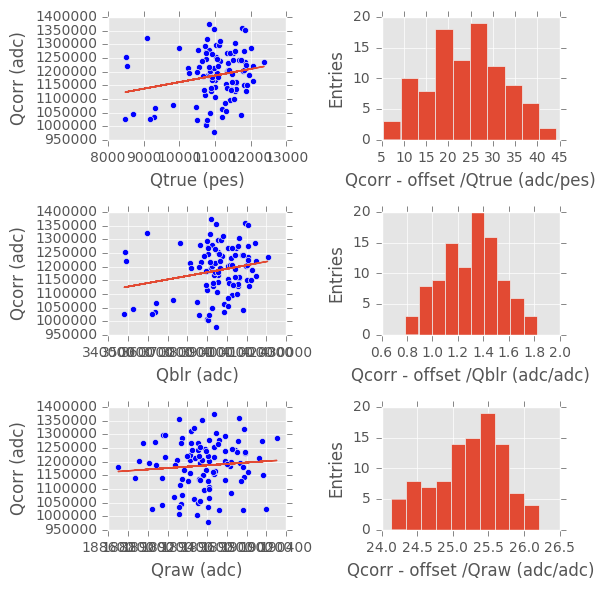

In [31]:
qtrue, qraw, qblr, qcor = [], [], [], []
poly = lambda x: coefs[1] + coefs[0]*x

for i in np.arange(100):
    twf = tbl.read_wf_table(pmttwf,i)
    rwf = pmtrwf[i]
    blr = pmtblr[i]
    cwf = pmtcwf[i]
    qtrue += [IntegrateTrue(twf)]
    qraw  += [IntegrateRaw(rwf)]
    qblr  += [IntegrateRaw(blr)]
    qcor  += [IntegrateCorr(cwf)]

qtrue = np.array(qtrue)
qraw  = np.array(qraw)
qblr  = np.array(qblr)
qcor  = np.array(qcor)

plt.figure( figsize = (6,6) )

plt.subplot(3,2,1)
plt.scatter(qtrue,qcor)
coefs = np.polyfit(qtrue,qcor,1)
qcor_fit = map( poly, qtrue )
plt.plot(qtrue,qcor_fit)
plt.xlabel('Qtrue (pes)')
plt.ylabel('Qcorr (adc)')

plt.subplot(3,2,2)
h = plt.hist((qcor-coefs[1])/qtrue,bins=10)
plt.xlabel('Qcorr - offset /Qtrue (adc/pes)')
plt.ylabel('Entries')

plt.subplot(3,2,3)
plt.scatter(qblr,qcor)
coefs = np.polyfit(qblr,qcor,1)
qcor_fit = map( poly, qblr )
plt.plot(qblr,qcor_fit)

plt.xlabel('Qblr (adc)')
plt.ylabel('Qcorr (adc)')

plt.subplot(3,2,4)
h = plt.hist( (qcor-coefs[1])/qblr, bins = 10 )
plt.xlabel('Qcorr - offset /Qblr (adc/adc)')
plt.ylabel('Entries')

plt.subplot(3,2,5)
plt.scatter(qraw,qcor)
coefs = np.polyfit(qraw,qcor,1)
qcor_fit = map( poly, qraw )
plt.plot(qraw,qcor_fit)

plt.xlabel('Qraw (adc)')
plt.ylabel('Qcorr (adc)')

plt.subplot(3,2,6)
h = plt.hist( (qcor-coefs[1])/qraw, bins = 10 )
plt.xlabel('Qcorr - offset /Qraw (adc/adc)')
plt.ylabel('Entries')

plt.tight_layout()


# THRESHOLDS = 5.0, 2.0, 3.0

In [32]:
# open file and check its contents
h5f = tb.open_file('/Users/Gonzalo/github/IC/data/DIOMIRA0_523.h5')
print(h5f)

/Users/Gonzalo/github/IC/data/DIOMIRA0_523.h5 (File) ''
Last modif.: 'Sat Oct 15 23:57:29 2016'
Object Tree: 
/ (RootGroup) ''
/BLR (Group) ''
/BLR/acum (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/baseline (EArray(100, 12), shuffle, zlib(1)) ''
/BLR/mau (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/pulse_on (EArray(100, 32000), shuffle, zlib(1)) ''
/BLR/wait_over (EArray(100, 32000), shuffle, zlib(1)) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(806,), zlib(1)) ''
/RD (Group) ''
/RD/pmtblr (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtcwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/pmtrwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(100, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/PMT (Table(1420,), shuffle, zlib(1)) 'Store for PMTs TWF'
/TWF/SiPM (Table(10

In [33]:
pmttwf  = h5f.root.TWF.PMT
sipmtwf = h5f.root.TWF.SiPM
pmtblr  = h5f.root.RD.pmtblr
pmtcwf  = h5f.root.RD.pmtcwf
pmtrwf  = h5f.root.RD.pmtrwf
sipmrwf = h5f.root.RD.sipmrwf
pmtdf   = snf.read_data_sensors(h5f.root.Sensors.DataPMT)
sipmdf  = snf.read_data_sensors(h5f.root.Sensors.DataSiPM)

## Check PMT CWF

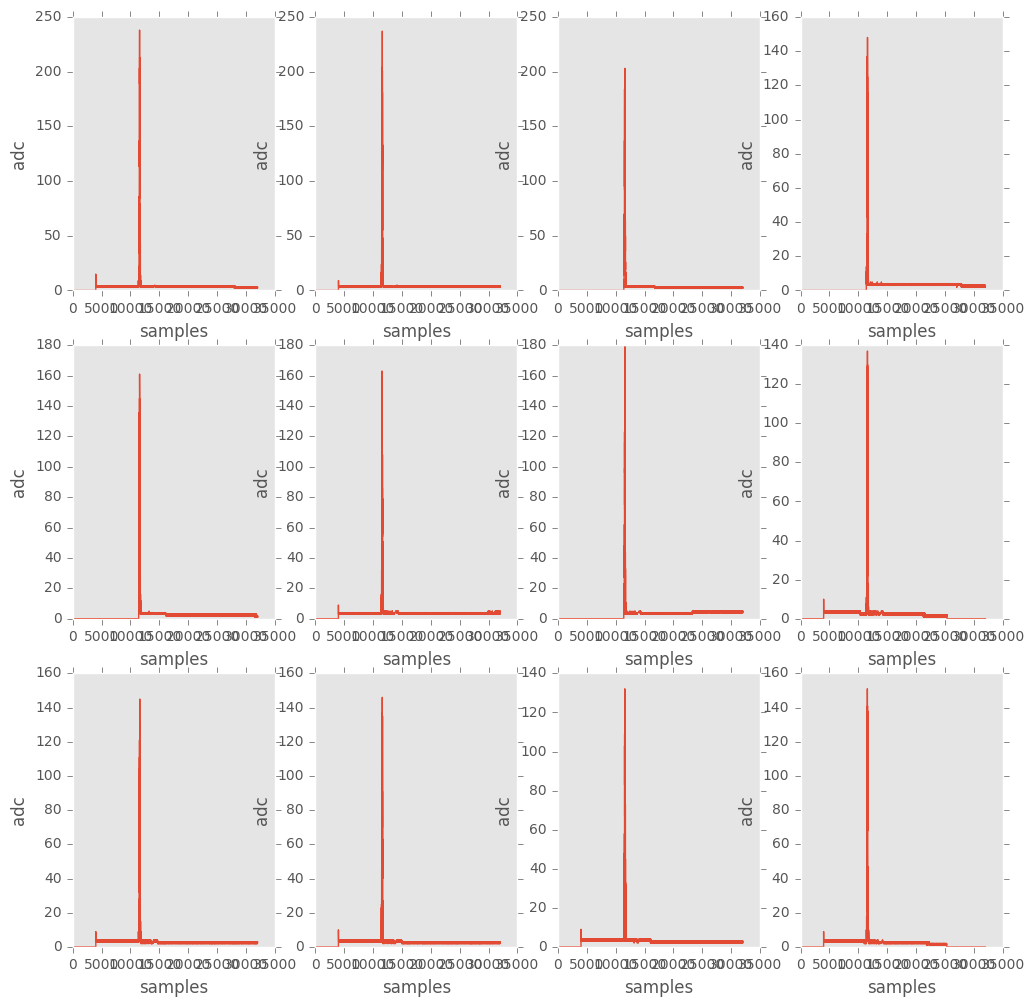

In [34]:
mpl.plot_waveforms(dict(enumerate(pmtcwf[0])))

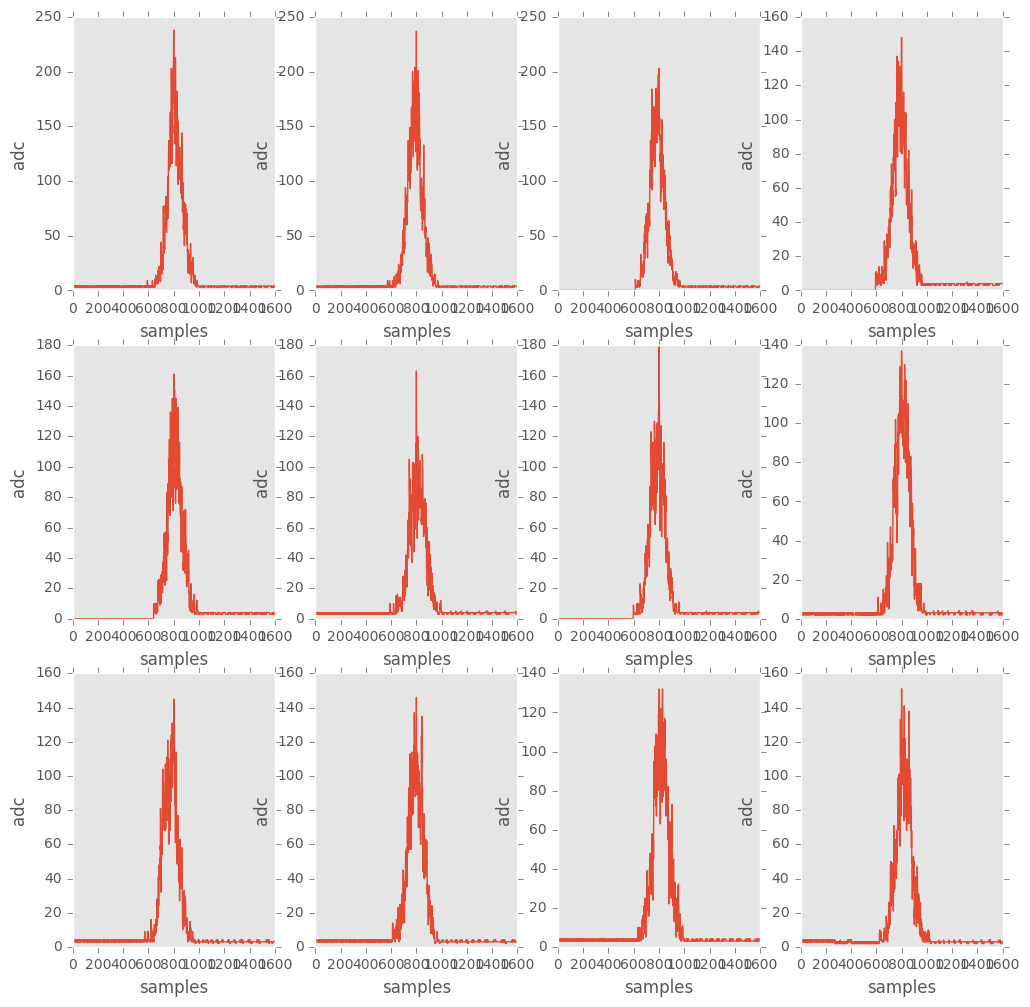

In [35]:
mpl.plot_waveforms(dict(enumerate(pmtcwf[0])),zoom=True)

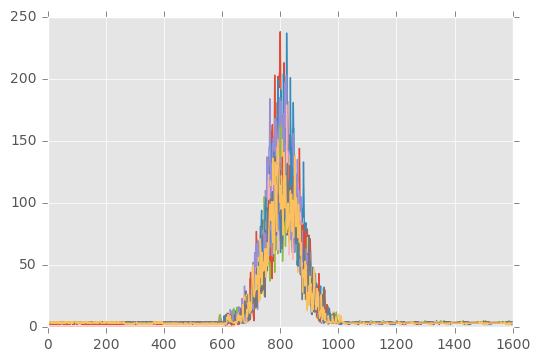

In [36]:
mpl.overlap_waveforms(pmtcwf,0)

## Compare CWF with BLR

RED  = CWF

BLUE = BLR

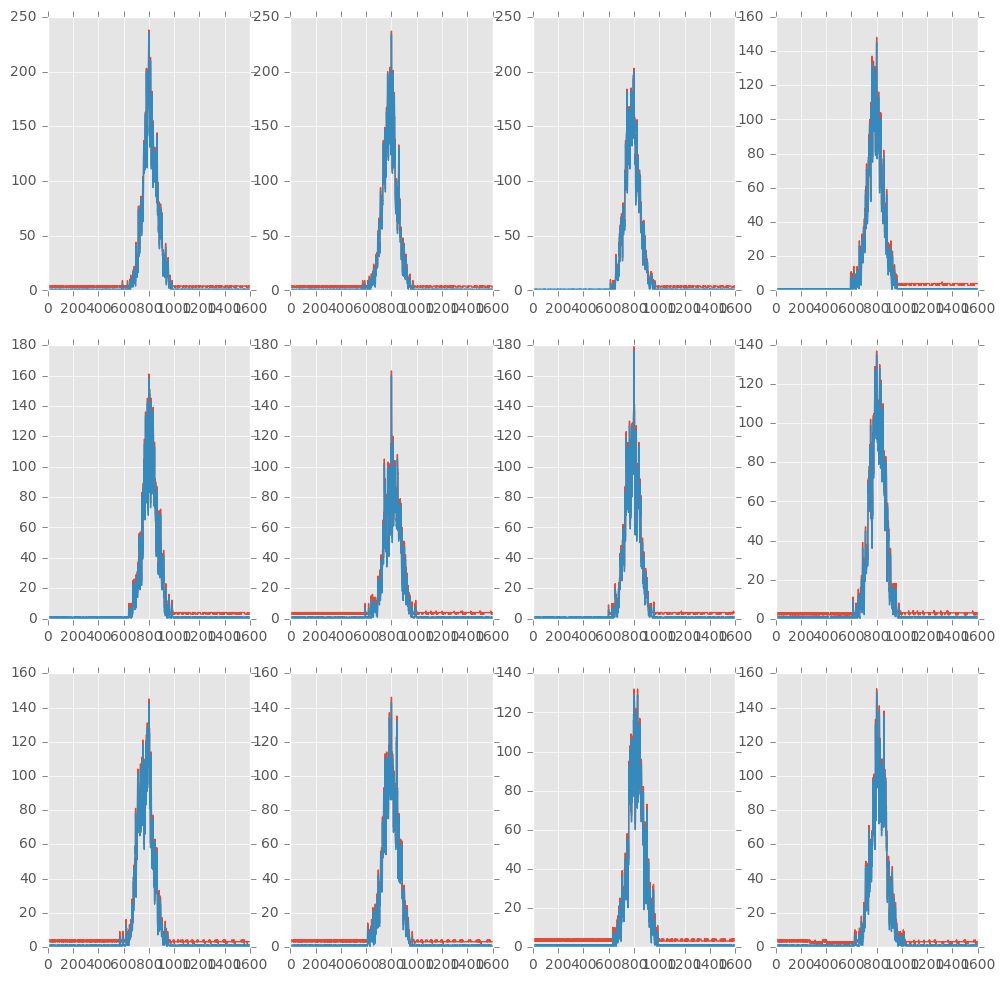

In [37]:
mpl.compare_corr_raw(pmtcwf,pmtblr,0)

## Compare CWF with RWF

RED  = CWF

BLUE = RWF

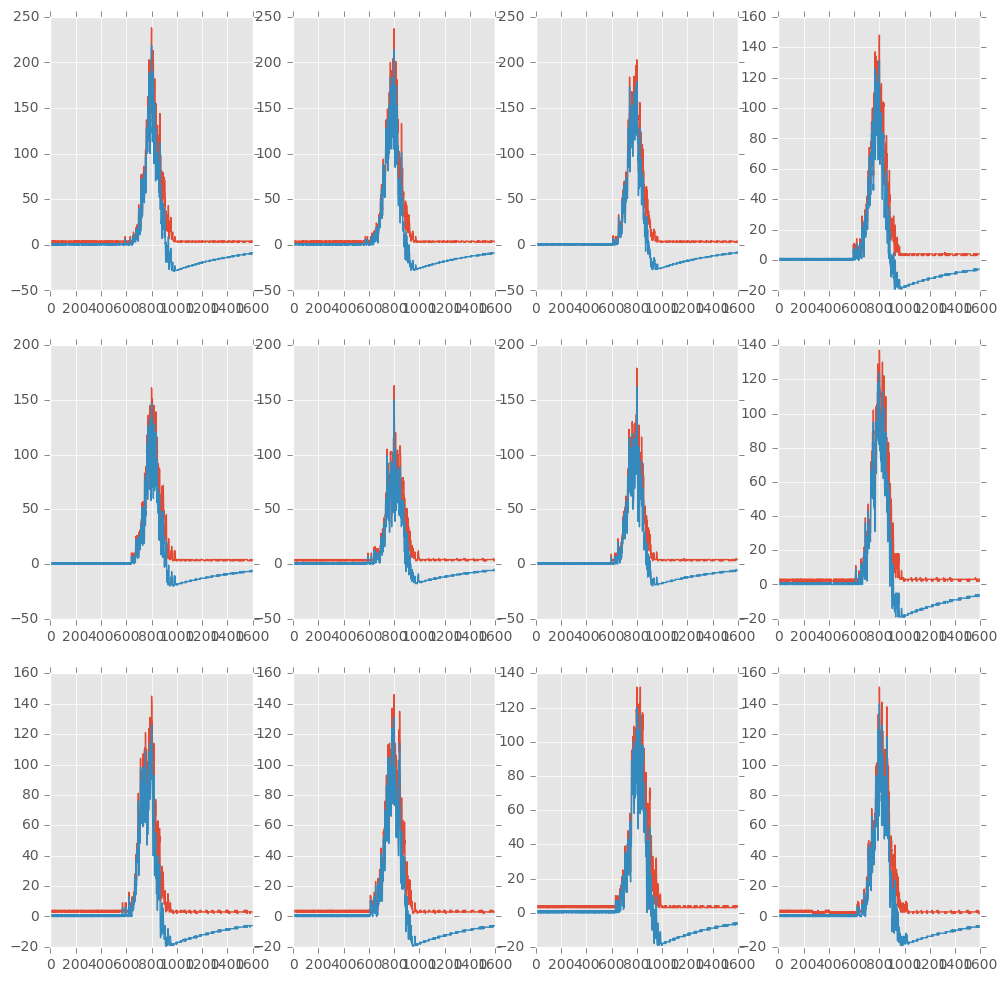

In [38]:
mpl.compare_corr_raw(pmtcwf,pmtrwf,0)

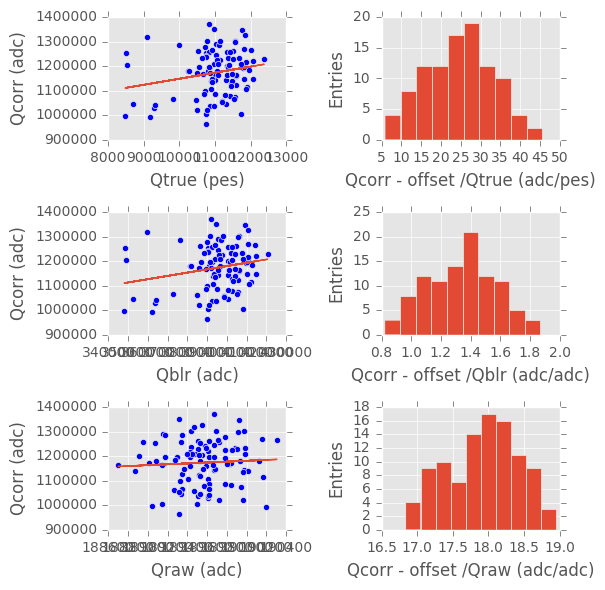

In [39]:
qtrue, qraw, qblr, qcor = [], [], [], []
poly = lambda x: coefs[1] + coefs[0]*x

for i in np.arange(100):
    twf = tbl.read_wf_table(pmttwf,i)
    rwf = pmtrwf[i]
    blr = pmtblr[i]
    cwf = pmtcwf[i]
    qtrue += [IntegrateTrue(twf)]
    qraw  += [IntegrateRaw(rwf)]
    qblr  += [IntegrateRaw(blr)]
    qcor  += [IntegrateCorr(cwf)]

qtrue = np.array(qtrue)
qraw  = np.array(qraw)
qblr  = np.array(qblr)
qcor  = np.array(qcor)

plt.figure( figsize = (6,6) )

plt.subplot(3,2,1)
plt.scatter(qtrue,qcor)
coefs = np.polyfit(qtrue,qcor,1)
qcor_fit = map( poly, qtrue )
plt.plot(qtrue,qcor_fit)
plt.xlabel('Qtrue (pes)')
plt.ylabel('Qcorr (adc)')

plt.subplot(3,2,2)
h = plt.hist((qcor-coefs[1])/qtrue,bins=10)
plt.xlabel('Qcorr - offset /Qtrue (adc/pes)')
plt.ylabel('Entries')

plt.subplot(3,2,3)
plt.scatter(qblr,qcor)
coefs = np.polyfit(qblr,qcor,1)
qcor_fit = map( poly, qblr )
plt.plot(qblr,qcor_fit)

plt.xlabel('Qblr (adc)')
plt.ylabel('Qcorr (adc)')

plt.subplot(3,2,4)
h = plt.hist( (qcor-coefs[1])/qblr, bins = 10 )
plt.xlabel('Qcorr - offset /Qblr (adc/adc)')
plt.ylabel('Entries')

plt.subplot(3,2,5)
plt.scatter(qraw,qcor)
coefs = np.polyfit(qraw,qcor,1)
qcor_fit = map( poly, qraw )
plt.plot(qraw,qcor_fit)

plt.xlabel('Qraw (adc)')
plt.ylabel('Qcorr (adc)')

plt.subplot(3,2,6)
h = plt.hist( (qcor-coefs[1])/qraw, bins = 10 )
plt.xlabel('Qcorr - offset /Qraw (adc/adc)')
plt.ylabel('Entries')

plt.tight_layout()
